In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Exploring Data

In [108]:
train_data = pd.read_csv('datasets/AMZN_train.csv')
test_data = pd.read_csv('datasets/AMZN_test.csv')
val_data = pd.read_csv('datasets/AMZN_val.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [109]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


In [110]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [111]:
# Date is an object so we need to call describe seperatly here
train_data['Date'].describe()

count           4781
unique          4781
top       1997-05-15
freq               1
Name: Date, dtype: object

In [114]:
train_data['Date'].min(), train_data['Date'].max()

('1997-05-15', '2016-05-13')

<Axes: xlabel='Date'>

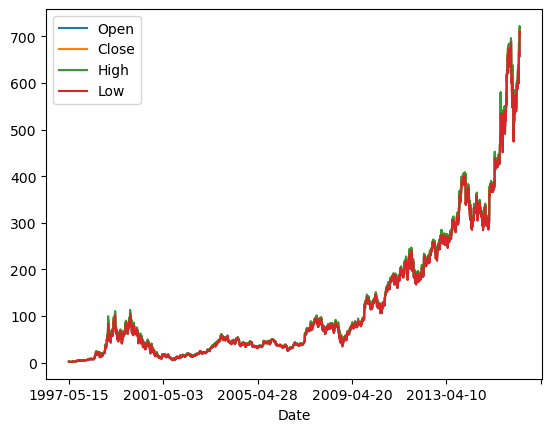

In [116]:
train_data.plot(x='Date', y =['Open', 'Close', 'High', 'Low'])

In [117]:
# creating a function to evaluate all datasets the same way
def analyse_data(data):
    data.info()
    data.describe()
    data['Date'].describe()
    data['Date'].min()
    data['Date'].max()
    data.plot(x='Date', y =['Open', 'Close', 'High', 'Low'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


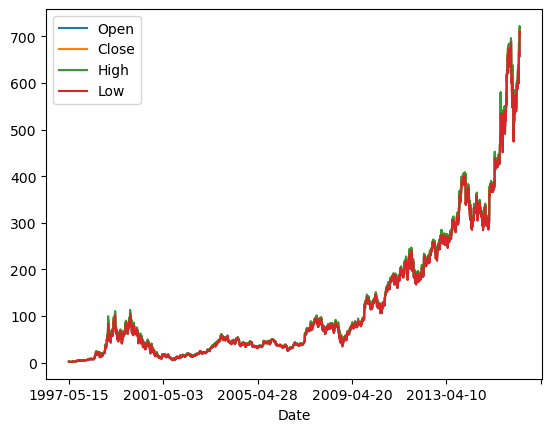

In [118]:
analyse_data(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


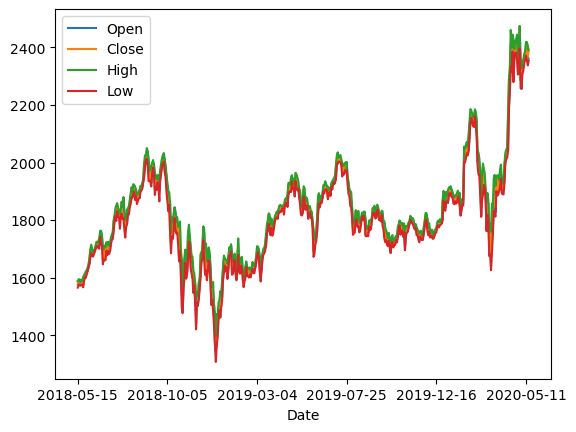

In [119]:
analyse_data(test_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB


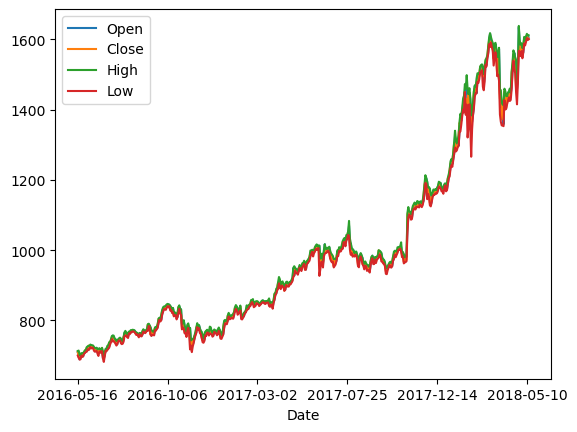

In [120]:
analyse_data(val_data)

In [121]:
# sort the rows by date
train_data.sort_values(by='Date', inplace=True)
test_data.sort_values(by='Date', inplace=True)
val_data.sort_values(by='Date', inplace=True)

In [125]:
# create target variable based on the fact if stock price was bigger on open than on close
train_data['Direction'] = (train_data['Open'] > train_data['Close']).astype(int)
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Direction
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1


In [124]:
test_data['Direction'] = (test_data['Open'] > test_data['Close']).astype(int)
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Direction
0,2018-05-15,1587.800049,1587.800049,1565.219971,1576.119995,1576.119995,5077500,1
1,2018-05-16,1577.500000,1594.430054,1576.670044,1587.280029,1587.280029,2570600,0
2,2018-05-17,1580.560059,1594.040039,1573.000000,1581.760010,1581.760010,2147600,0
3,2018-05-18,1581.329956,1583.589966,1572.099976,1574.369995,1574.369995,2642600,1
4,2018-05-21,1585.000000,1592.050049,1575.000000,1585.459961,1585.459961,2925200,0


In [126]:
val_data['Direction'] = (val_data['Open'] > val_data['Close']).astype(int)
val_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Direction
0,2016-05-16,710.130005,713.250000,700.280029,710.659973,710.659973,5432900,0
1,2016-05-17,709.900024,714.469971,693.909973,695.270020,695.270020,5121400,1
2,2016-05-18,689.559998,702.539978,688.760010,697.450012,697.450012,4283200,0
3,2016-05-19,691.880005,699.400024,689.559998,698.520020,698.520020,3025600,0
4,2016-05-20,701.049988,707.239990,700.000000,702.799988,702.799988,2916200,0


In [127]:
train_data['Direction'].value_counts()

Direction
0    2426
1    2355
Name: count, dtype: int64

## Feature Engineering

A typical measurement when talking about stock prices is the rolling average of certain amount of days. This feature might help with the prediction so we I'm going to add it.

In [129]:
# use pandas rolling method
train_data['Rolling_avg_3d'] = (train_data['Open']-train_data['Close']).rolling(window=3,min_periods=1).mean()
train_data['Rolling_avg_5d'] = (train_data['Open']-train_data['Close']).rolling(window=5,min_periods=1).mean()
train_data['Rolling_avg_7d'] = (train_data['Open']-train_data['Close']).rolling(window=7,min_periods=1).mean()

test_data['Rolling_avg_3d'] = (test_data['Open']-test_data['Close']).rolling(window=3,min_periods=1).mean()
test_data['Rolling_avg_5d'] = (test_data['Open']-test_data['Close']).rolling(window=5,min_periods=1).mean()
test_data['Rolling_avg_7d'] = (test_data['Open']-test_data['Close']).rolling(window=7,min_periods=1).mean()

val_data['Rolling_avg_3d'] = (val_data['Open']-val_data['Close']).rolling(window=3,min_periods=1).mean()
val_data['Rolling_avg_5d'] = (val_data['Open']-val_data['Close']).rolling(window=5,min_periods=1).mean()
val_data['Rolling_avg_7d'] = (val_data['Open']-val_data['Close']).rolling(window=7,min_periods=1).mean()

train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Direction,Rolling_avg_3d,Rolling_avg_5d,Rolling_avg_7d
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1,0.479167,0.479167,0.479167
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1,0.359375,0.359375,0.359375
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1,0.256945,0.256945,0.256945
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1,0.128472,0.216146,0.216146
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1,0.118056,0.214584,0.214584


The total range of the price change could also be interesting, e.g. if the price went up by a large amount it's likely that it will go up for the next couple of days as well.

In [130]:
train_data['Price_change'] = train_data['Open'] - train_data['Close']
test_data['Price_change'] = test_data['Open'] - test_data['Close']
val_data['Price_change'] = val_data['Open'] - val_data['Close']

## Machine Learning for predicting the price direction

I create a common ML pipe so I can test multiple algorithms

In [145]:
X_train = train_data.drop(columns=['Direction', 'Date'])
y_train = train_data['Direction']

X_test = test_data.drop(columns=['Direction', 'Date'])
y_test = test_data['Direction']

X_val = val_data.drop(columns=['Direction', 'Date'])
y_val = val_data['Direction']

In [146]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay

def pipe(algorithm_name, algorithm):
    #prepare the model
    model = make_pipeline(MaxAbsScaler(),algorithm)
    #train the model
    model.fit(X_train, y_train)
    #create predictions
    y_predict = model.predict(X_val)
    
    print(type(y_predict))
    
    #evaluate the predictions of the model 
    accuracy = accuracy_score(y_val, y_predict)
    precision = precision_score(y_val, y_predict, average='binary')
    recall = recall_score(y_val, y_predict, average='binary')
    f1 = f1_score(y_val, y_predict, average='binary')
    cm = confusion_matrix(y_val, y_predict)
    roc_auc = roc_auc_score(y_val, y_predict)
    
    #output the result
    print(f'Algorithm: {algorithm_name}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1}')
    print(cm)
    print(f'Roc_auc: {roc_auc}')
    
    RocCurveDisplay.from_estimator(model, X_val, y_val)
    plt.title(f'ROC Curve - {algorithm_name}')
    plt.show()
    

<class 'numpy.ndarray'>
Algorithm: LogisticRegression
Accuracy: 0.9085487077534792
Precision: 0.8939393939393939
Recall: 0.9291338582677166
F1_score: 0.9111969111969113
[[221  28]
 [ 18 236]]
Roc_auc: 0.9083420295354648


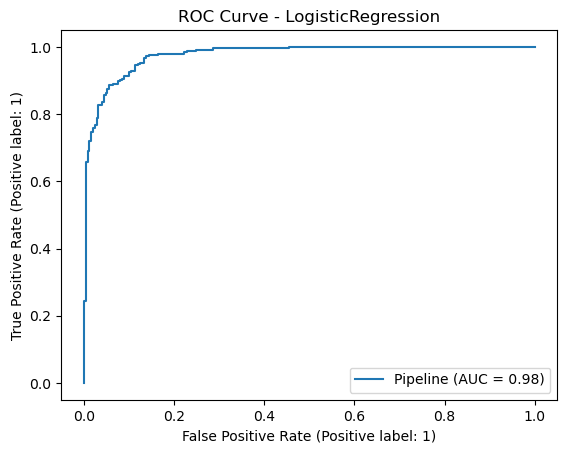

In [147]:
from sklearn.linear_model import LogisticRegression
pipe('LogisticRegression', LogisticRegression())

<class 'numpy.ndarray'>
Algorithm: KNN
Accuracy: 0.8111332007952287
Precision: 0.7694915254237288
Recall: 0.8937007874015748
F1_score: 0.8269581056466303
[[181  68]
 [ 27 227]]
Roc_auc: 0.8103042089618315


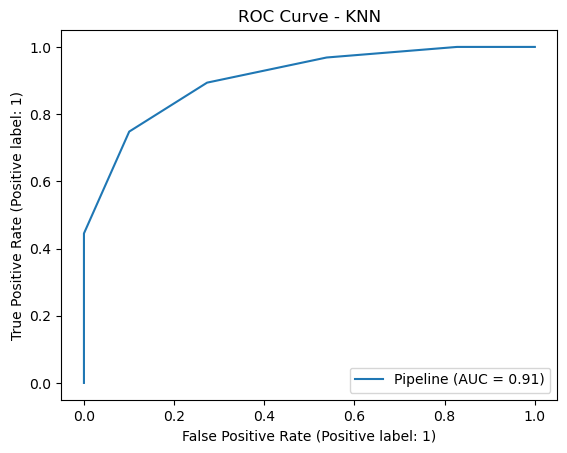

In [148]:
from sklearn.neighbors import KNeighborsClassifier
pipe('KNN', KNeighborsClassifier())